# Defense to plaintex generator

Below we compare performance of different generators that were training with a varying number of plaintext attacks and number of varying masks.

In [7]:
import pathlib as plib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
import os
from pprint import pprint


root = "/scratch"


MODEL_DIR = "../models/celeba_decoders"


models = {

    "100": {
        "1 mask": "celeba_1_learned_mixed_mask_out768_offset100000_nfiles100000_50epoch_batch4_schedNone_seed0_Conv3_10000_l1_100trainfiles_27102022_14h22",
        "10 masks": "celeba_10_learned_mixed_mask_out768_offset100000_nfiles100000_50epoch_batch4_schedNone_seed0_Conv3_10000_l1_100trainfiles_27102022_21h17",
        "10 random": "celeba_10_random_mixed_mask_nonlinTrue_out768_offset100000_nfiles100000_50epoch_batch4_schedNone_seed0_Conv3_10000_l1_100trainfiles_28102022_03h53",
        "100 masks": "celeba_100_random_mixed_mask_nonlinTrue_out768_offset100000_nfiles100000_50epoch_batch4_schedNone_seed0_Conv3_10000_l1_100trainfiles_28102022_01h54"
    },
    "1000": {
        "1 mask": "celeba_1_learned_mixed_mask_out768_offset100000_nfiles100000_50epoch_batch16_schedNone_seed0_Conv3_10000_l1_1000trainfiles_27102022_19h54",
        "10 masks": "celeba_10_learned_mixed_mask_out768_offset100000_nfiles100000_50epoch_batch16_schedNone_seed0_Conv3_10000_l1_1000trainfiles_27102022_21h37",
        "10 random": "celeba_10_random_mixed_mask_nonlinTrue_out768_offset100000_nfiles100000_50epoch_batch16_schedNone_seed0_Conv3_10000_l1_1000trainfiles_28102022_04h00",
        "100 masks": "celeba_100_random_mixed_mask_nonlinTrue_out768_offset100000_nfiles100000_50epoch_batch16_schedNone_seed0_Conv3_10000_l1_1000trainfiles_28102022_02h09"
    },
    "10000": {
        "1 mask": "celeba_1_learned_mixed_mask_out768_offset100000_nfiles100000_50epoch_batch32_schedNone_seed0_Conv3_10000_l1_10000trainfiles_27102022_13h46",
        "10 masks": "celeba_10_learned_mixed_mask_out768_offset100000_nfiles100000_50epoch_batch32_schedNone_seed0_Conv3_10000_l1_10000trainfiles_27102022_22h23",
        "10 random": "celeba_10_random_mixed_mask_nonlinTrue_out768_offset100000_nfiles100000_50epoch_batch32_schedNone_seed0_Conv3_10000_l1_10000trainfiles_28102022_04h15",
        "100 masks": "celeba_100_random_mixed_mask_nonlinTrue_out768_offset100000_nfiles100000_50epoch_batch32_schedNone_seed0_Conv3_10000_l1_10000trainfiles_28102022_02h33"
    },
    "100000": {
        "1 mask": "celeba_1_learned_mixed_mask_out768_offset100000_nfiles100000_50epoch_batch32_schedNone_seed0_Conv3_10000_l1_100000trainfiles_26102022_09h41",
        "10 masks": "celeba_10_learned_mixed_mask_out768_offset100000_nfiles100000_50epoch_batch32_schedNone_seed0_Conv3_10000_l1_100000trainfiles_26102022_17h16",
        "10 random": "celeba_10_random_mixed_mask_nonlinTrue_out768_offset100000_nfiles100000_50epoch_batch32_schedNone_seed0_Conv3_10000_l1_100000trainfiles_28102022_05h35",
        "100 masks": "celeba_100_random_mixed_mask_nonlinTrue_out768_offset100000_nfiles100000_50epoch_batch32_schedNone_seed0_Conv3_10000_l1_100000trainfiles_27102022_19h46"
    },

}


markers = ["o", "s", "D", "P", "X", "v",  "<", ">", "D", ".", "1", "2", "3", "4", "8"]
linestyles = ["solid", "dotted", "dashed", "dashdot", (0, (3, 1, 1, 1, 1, 1))]
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
linewidth = 3
markersize = 200

markers = ["o", "s", "D", "P", "X", "v",  "<", ">", "D", ".", "1", "2", "3", "4", "8"]

markers_dict = {
    "1 mask": "o",
    "10 masks": "s",
    "10 random": "X",
    "100 masks": "^",
}

# psnr / ssim

1 mask : 19.3, 50
10 masks : 18, 50
100 masks : 16.1, 50
Saved plot to :  decoder_psnr_100000examples.png


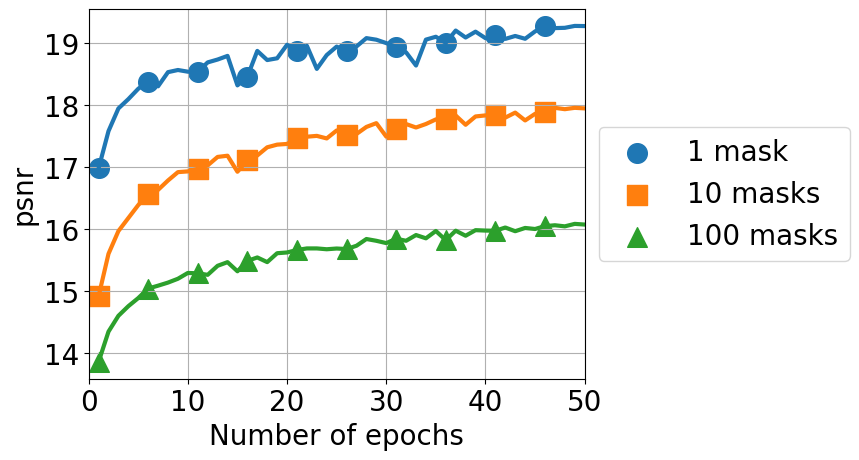

In [23]:
metric = "psnr"    # psnr, ssim
every = 10
offset = 5

n_examples_filt = None
n_examples_filt = ["100000"]
n_masks_filt = None
n_masks_filt = ["1 mask", "10 masks", "100 masks"]
# n_masks_filt = ["10 masks", "10 random"]


# looking at test metrics
ax = plt.subplot(111)
for n_examples in models.keys():
    if n_examples_filt is not None and n_examples not in n_examples_filt:
        continue

    for n_masks in models[n_examples].keys():
        if n_masks_filt is not None and n_masks not in n_masks_filt:
            continue

        # create label
        _label = []
        if n_examples_filt is None or len(n_examples_filt) > 1:
            _label += [n_examples]
        if n_masks_filt is None or len(n_masks_filt) > 1:
            _label += [n_masks]
        _label = ", ".join(_label)
        model_path = MODEL_DIR / plib.Path(models[n_examples][n_masks])

        # fp = str(plib.Path(model_path) / "train_metrics.npy")

        # if not os.path.isfile(fp):
        fp = str(plib.Path(model_path) / "test_metrics.npy")

        if os.path.isfile(fp):
            test_metrics = np.load(fp, allow_pickle='TRUE').item()
            if metric in test_metrics.keys():
                curve = test_metrics[metric]
                n_epoch = np.arange(len(curve)) + 1
                if len(curve) < offset:
                    max_val = np.max(curve)
                else:
                    max_val = np.max(curve[offset:])
                print(f"{_label} : {max_val:.3g}, {len(curve)}")
                # print(f"{_label} : {max_val}, {len(curve)}")
                line, = plt.plot(n_epoch,  curve, linewidth=linewidth, )
                plt.scatter(n_epoch[::5], curve[::5], marker=markers_dict[n_masks], label=_label, s=markersize)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel(metric)
plt.xlim([0, 50])
plt.xlabel("Number of epochs");

fp = f"decoder_{metric}"
if n_examples_filt is not None and len(n_examples_filt) == 1:
    fp += f"_{n_examples_filt[0]}examples"
if n_masks_filt is not None and len(n_masks_filt) == 1:
    fp += f"_{n_masks_filt[0]}masks"
fp += ".png"
plt.savefig(fp, bbox_inches='tight')
plt.grid()
print("Saved plot to : ", fp)

# loss

1 mask - best loss in 50 epochs : 0.075
1 mask - best *train* loss in 50 epochs : 0.073
10 masks - best loss in 50 epochs : 0.09
10 masks - best *train* loss in 50 epochs : 0.084
10 random - best loss in 50 epochs : 0.09
10 random - best *train* loss in 50 epochs : 0.085
100 masks - best loss in 50 epochs : 0.114
100 masks - best *train* loss in 50 epochs : 0.101
Saved plot to :  decoder_psnr_100000examples.png


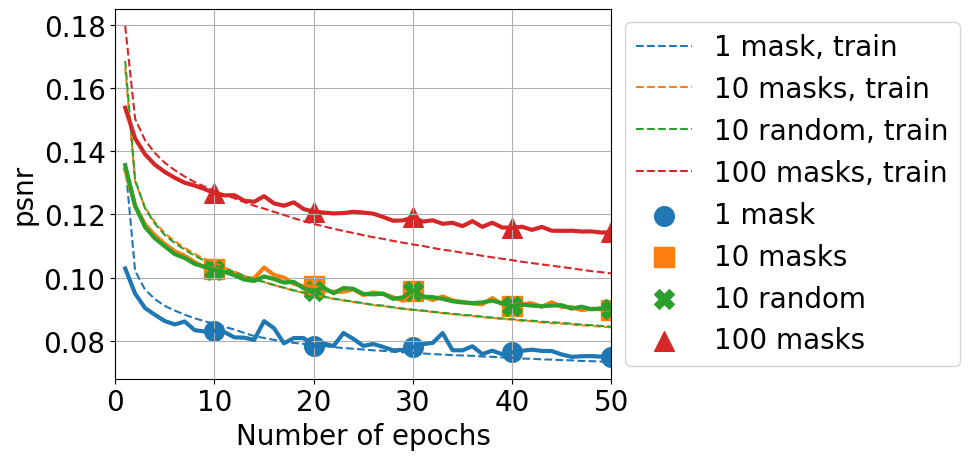

In [34]:
every = 10
offset = 5

n_examples_filt = None
n_examples_filt = ["100000"]
n_masks_filt = None
# n_masks_filt = ["1 mask", "10 masks", "100 masks"]
# n_masks_filt = ["10 masks", "10 random"]


# looking at test metrics
ax = plt.subplot(111)
for n_examples in models.keys():
    if n_examples_filt is not None and n_examples not in n_examples_filt:
        continue

    for n_masks in models[n_examples].keys():
        if n_masks_filt is not None and n_masks not in n_masks_filt:
            continue

        # create label
        _label = []
        if n_examples_filt is None or len(n_examples_filt) > 1:
            _label += [n_examples]
        if n_masks_filt is None or len(n_masks_filt) > 1:
            _label += [n_masks]
        _label = ", ".join(_label)
        model_path = MODEL_DIR / plib.Path(models[n_examples][n_masks])

        test_loss_fp = str(plib.Path(model_path) / "test_loss.npy")
        if os.path.exists(test_loss_fp):
            test_loss = np.load(test_loss_fp)
            n_epoch = np.arange(len(test_loss)) + 1
            print(f"{_label} - best loss in {min(MAX_EPOCH, len(test_loss))} epochs : {round(np.min(test_loss[:MAX_EPOCH]), 3)}")
            line, = plt.plot(n_epoch,  test_loss, linewidth=linewidth, linestyle="-")
            ax.scatter(n_epoch[every-1::every], test_loss[every-1::every], marker=markers_dict[n_masks], s=markersize, c=line.get_color(), label=_label)
        else:
            print(f"{_label} - {test_loss_fp} does not exist")

        if plot_train:
            train_loss_fp = str(plib.Path(model_path) / "train_loss.npy")
            if os.path.exists(train_loss_fp):
                train_loss = np.load(train_loss_fp)
                n_epoch = np.arange(len(train_loss)) + 1
                print(f"{_label} - best *train* loss in {min(MAX_EPOCH, len(train_loss))} epochs : {round(np.min(train_loss[:MAX_EPOCH]), 3)}")
                plt.plot(n_epoch,  train_loss, c=line.get_color(), label=_label + ", train", linestyle="--")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel(metric)
plt.xlim([0, 50])
plt.xlabel("Number of epochs");

fp = f"decoder_{metric}"
if n_examples_filt is not None and len(n_examples_filt) == 1:
    fp += f"_{n_examples_filt[0]}examples"
if n_masks_filt is not None and len(n_masks_filt) == 1:
    fp += f"_{n_masks_filt[0]}masks"
fp += ".png"
plt.savefig(fp, bbox_inches='tight')
plt.grid()
print("Saved plot to : ", fp)


# Visualize decoded examples

Use `python scripts/generate_celeba_examples.py` to saved generated examples.

In [43]:
import numpy as np
import pathlib as plib
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from lenslessclass.generator import SingleHidden, Conv3, Conv, FC2PretrainedStyleGAN
from lenslessclass.datasets import CelebAAugmented
import json
from pprint import pprint
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
from waveprop.devices import slm_dict, sensor_dict
import torchvision.datasets as dset
import matplotlib
from torch.utils.data import Subset


model_dir = MODEL_DIR / plib.Path(models["100000"]["1 mask"])
model_dir = MODEL_DIR / plib.Path(models["100000"]["100 masks"])


# Opening JSON file
f = open(str(model_dir / "metadata.json"))
metadata = json.load(f)
pprint(metadata)

{'batch_size': 32,
 'best_test_loss': 0.11426718405950298,
 'best_test_loss_epoch': 49,
 'dataset': {'attr': 'Male',
             'mean': 0.45541855692863464,
             'n_files': 100000,
             'path': '/home/bezzam/LenslessClassification/celeba_100_random_mixed_mask_nonlinTrue_out768_offset100000_nfiles100000',
             'std': 0.24510128796100616},
 'hidden_dim': 10000,
 'model': 'Conv3_10000',
 'noise_type': None,
 'offset': 100000,
 'seed': 0,
 'snr': None,
 'target_dim': [218, 178],
 'timestamp (DDMMYYYY_HhM)': '27102022_19h46'}


In [44]:
offset = metadata["offset"] if "offset" in metadata.keys() else 0

# load test set
test_indices = np.load(model_dir / "test_indices.npy")
trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize(metadata["dataset"]["mean"], metadata["dataset"]["std"])])
all_data = CelebAAugmented(
    path=metadata["dataset"]["path"], 
    transform=trans,
    return_original=root, 
    target_dim=metadata["target_dim"],
    offset=offset
)
test_set = Subset(all_data, test_indices - offset)
print(len(test_set))

15000


In [45]:
print("embedding shape", test_set[0][0].shape)
print("image shape", test_set[0][2].shape)

embedding shape torch.Size([1, 24, 32])
image shape torch.Size([1, 218, 178])


In [46]:
from lenslessclass.util import device_checks

single_gpu = True
device = "cuda:1"

# load model
use_cuda = torch.cuda.is_available()
if use_cuda:
    print("CUDA available, using GPU.")
else:
    device = "cpu"
    print("CUDA not available, using CPU.")

device, use_cuda, multi_gpu, device_ids = device_checks(device=device, single_gpu=single_gpu)

print(device, device_ids)

CUDA available, using GPU.
cuda:1 [1]


In [47]:
# detect which model from name
if "SingleHidden" in metadata["model"]:
    model = SingleHidden(
        input_shape=np.prod(test_set[0][0].shape), 
        hidden_dim=metadata["hidden_dim"], 
        n_output=np.prod(test_set[0][2].shape), 
    )
elif "Conv3" in metadata["model"]:
    model = Conv3(
        input_shape=np.prod(test_set[0][0].shape), 
        hidden_dim=metadata["hidden_dim"], 
        n_output=np.prod(test_set[0][2].shape), 
    )
elif "Conv" in metadata["model"]:
    model = Conv(
        input_shape=np.prod(test_set[0][0].shape), 
        hidden_dim=metadata["hidden_dim"], 
        n_output=np.prod(test_set[0][2].shape), 
    )
elif metadata["model"] == 'FC2PretrainedStyleGAN_3':
    model = FC2PretrainedStyleGAN(
        input_shape=list(test_set[0][0].shape[1:]),
        hidden=[800, 800],
        fp="/scratch/stylegan2/pretrained/ffhq.pkl",
        output_dim=list(test_set[0][2].shape[1:]),
        grayscale=True,
    )
if use_cuda:
    model = model.to(device)
    
# need to call DataParallel as was trained with this
model = nn.DataParallel(model, device_ids=device_ids)

# -- load from state dict
state_dict_fp = str(model_dir / "state_dict.pth")
model.load_state_dict(torch.load(state_dict_fp))

model.eval()

DataParallel(
  (module): Conv3(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (decoder_lin): Sequential(
      (0): Linear(in_features=768, out_features=10000, bias=True)
      (1): ReLU(inplace=True)
      (2): Linear(in_features=10000, out_features=19008, bias=True)
      (3): ReLU(inplace=True)
    )
    (unflatten): Unflatten(dim=1, unflattened_size=(32, 27, 22))
    (decoder_conv): Sequential(
      (0): ConvTranspose2d(32, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
      (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): ConvTranspose2d(16, 8, kernel_size=(3, 3), stride=(2, 2))
      (4): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): ConvTranspose2d(8, 1, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    )
  )
)

In [48]:
print("\nModel's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())


Model's state_dict:
module.decoder_lin.0.weight 	 torch.Size([10000, 768])
module.decoder_lin.0.bias 	 torch.Size([10000])
module.decoder_lin.2.weight 	 torch.Size([19008, 10000])
module.decoder_lin.2.bias 	 torch.Size([19008])
module.decoder_conv.0.weight 	 torch.Size([32, 16, 3, 3])
module.decoder_conv.0.bias 	 torch.Size([16])
module.decoder_conv.1.weight 	 torch.Size([16])
module.decoder_conv.1.bias 	 torch.Size([16])
module.decoder_conv.1.running_mean 	 torch.Size([16])
module.decoder_conv.1.running_var 	 torch.Size([16])
module.decoder_conv.1.num_batches_tracked 	 torch.Size([])
module.decoder_conv.3.weight 	 torch.Size([16, 8, 3, 3])
module.decoder_conv.3.bias 	 torch.Size([8])
module.decoder_conv.4.weight 	 torch.Size([8])
module.decoder_conv.4.bias 	 torch.Size([8])
module.decoder_conv.4.running_mean 	 torch.Size([8])
module.decoder_conv.4.running_var 	 torch.Size([8])
module.decoder_conv.4.num_batches_tracked 	 torch.Size([])
module.decoder_conv.6.weight 	 torch.Size([8, 1, 

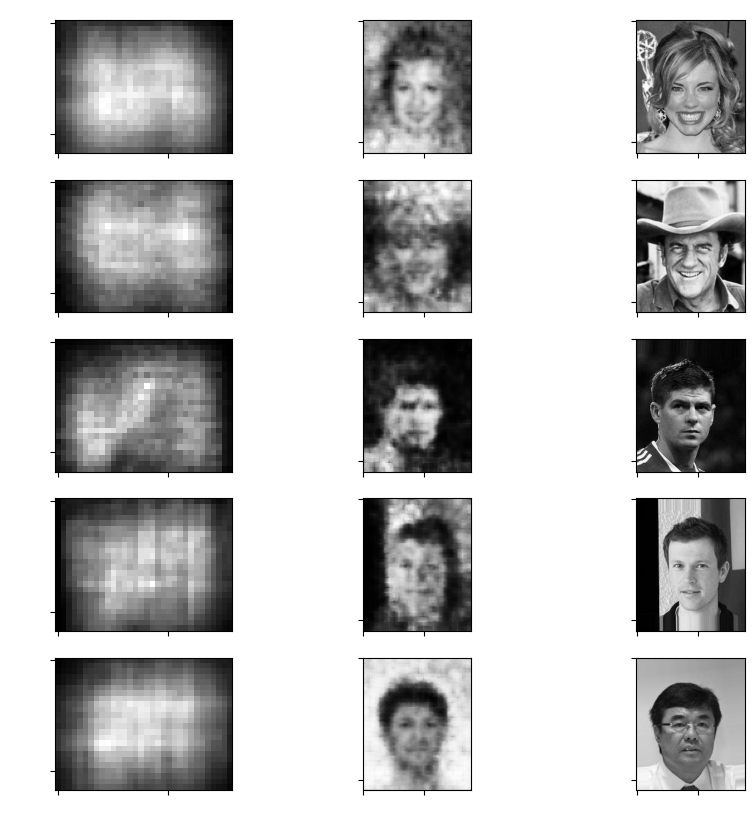

In [49]:
IDX = np.arange(5)

plt.figure(figsize=(10,10))
for n, _idx in enumerate(IDX):
    # generate"../celeba_adafruit_outdim768_height0.27_scene2mask0.55_poisson40.0_downpsf8.0_NORM_100000offset_10000files_50epoch_seed0_Conv3_10000_mse_27092022_09h51"
    ex = test_set[_idx]
    gen_out = model(ex[0].to(device))

    gen_out_img = gen_out.detach().cpu().numpy().squeeze()
    if len(gen_out.detach().cpu().numpy().squeeze().shape) == 1:
        gen_out_img = gen_out.detach().cpu().numpy().squeeze().reshape(metadata["target_dim"][0], metadata["target_dim"][1])
    else:
        # output already 2D
        gen_out_img = gen_out.detach().cpu().numpy().squeeze()

    # plot
    plot_ind = n * 3 + 1

    # -- raw
    plt.subplot(len(IDX), 3, plot_ind)
    plt.imshow(ex[0].detach().cpu().numpy().squeeze(), cmap="gray")
    plt.xticks(color='w')
    plt.yticks(color='w')

    # --recon
    plt.subplot(len(IDX), 3, plot_ind + 1)
    plt.imshow(gen_out_img, cmap="gray")
    plt.xticks(color='w')
    plt.yticks(color='w')

    # -- original
    plt.subplot(len(IDX), 3, plot_ind + 2)
    plt.imshow(ex[2].cpu().numpy().squeeze(), cmap="gray")
    plt.xticks(color='w')
    plt.yticks(color='w')